# Predicting NBA shots

*Class: Introduction to data science*

*Author: Dario Deković*

*Inspiration: [Bret Mehan, Predicting NBA shots, Stanford University](http://cs229.stanford.edu/proj2017/final-reports/5132133.pdf)*

*Dataset: [NBA shot logs](https://www.kaggle.com/dansbecker/nba-shot-logs)*

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction

Before we dive into the data I will give a quick overview of the type of research that Bret Mehan did in his paper. We can classify this research with regard to:

1. Purpose: **Applied research**\
    In his paper, he didn't develop any new algorithms but rather focused on utilizing existing methods to obtain the best results.

2. Depth: **Exploratory research**\
    Since this is an unsolved problem his focus is to coax some correlation between features and shot results.

3. Type of data: **Quantitative research**\
    Features are mostly numerical or can have a numerical representation.

4. Amount of data manipulation: **Observational research**\
    He just collected the data without affecting how it was collected.

5. Conclusion: **Deductive research**\
    This stems from his use of statistical methods and quantitative research.

6. Time of observation: **Longitudinal research**\
    Data was collected through an entire season.

7. Data source: **Secondary research**\
    He used data already scrapped and prepared in a CSV file.
    
8. Data collection: **Documentary research**\
    He collected data from an existing source


The data used in this project is from 2014/2015 NBA season and was scrapped from the NBA's REST API.

Since this data is publicly available I couldn't find any evidence that any part of Bret's paper is in breach of the research ethics.

**The main goal of this project is to develop a decent predictor of shot success based on the features available in the dataset.**

## Data analysis

The first step in any data science project is loading the data and doing some data analysis to get a feel for the data we are using.

In [41]:
shots = pd.read_csv('shot_logs.csv')

shots.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [42]:
shots.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [43]:
print(shots.dtypes)

GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object


In [44]:
print(shots['SHOT_RESULT'].value_counts())

missed    70164
made      57905
Name: SHOT_RESULT, dtype: int64


It is obvious that we have a mix of categorical and numerical data points. There are some unusual things in some columns that I am going to have to deal with later in the data cleaning stage. Also, the dataset is somewhat imbalanced but I am going to ignore that for now.

Next, I am going to visualize two features that Bret pointed out to be very important, CLOSE_DEF_DIST and SHOT_DIST.

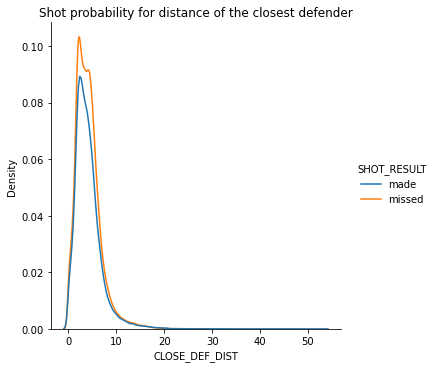

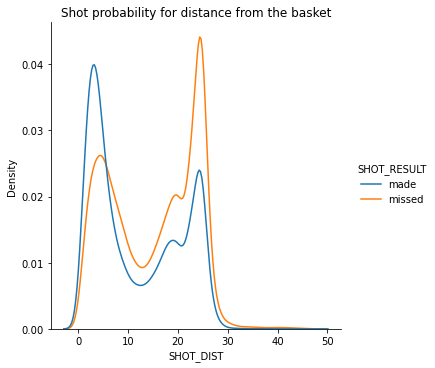

In [45]:
f = sns.displot(data=shots, x="CLOSE_DEF_DIST", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for distance of the closest defender")
plt.show()

f = sns.displot(data=shots, x="SHOT_DIST", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for distance from the basket")
plt.show()


I can't spot any apparent correlation between the distance of the closest defender and the shot's success. On the other hand, the correlation between the distance from the basket and the shot's success is quite apparent. Furthermore, that graph gives a glimpse into the development of the modern NBA game and the rising popularity of the three-point shot. I think it would be interesting to view the changes in this graph throughout NBA history.

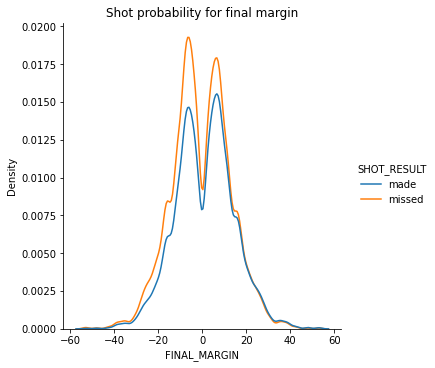

In [46]:
f = sns.displot(data=shots, x="FINAL_MARGIN", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for final margin")
plt.show()

## Data preprocessing

The following two cells contain two functions for some simple data preprocessing that I will use to clean the data.

In [47]:
def check_missing_data(df: pd.DataFrame) -> None:
    """
    Check the entire dataset for missing values
    """
    found = False
    for _, column in enumerate(df):
        if shots[column].isnull().any():
            found = True
            print(f"{column} number on missing values is {shots[column].isnull().sum()}")

    if not(found):
        print("There are no missing values in the dataset!")

check_missing_data(shots)

SHOT_CLOCK number on missing values is 5567


In [48]:
def change_values(column, final_val, is_column_name = True, condition = lambda x: pd.isnull(x), transformations = lambda x: x):
    """
    Change the values in a given column based on some condition. New value can be given or derived from some other column.
    Transformations can be applied to the values from other columns.
    """
    for i, elem in enumerate(shots[column]):
        if condition(elem):
            shots.loc[i, column] = (transformations(shots.loc[i, final_val]) if is_column_name else final_val)

720


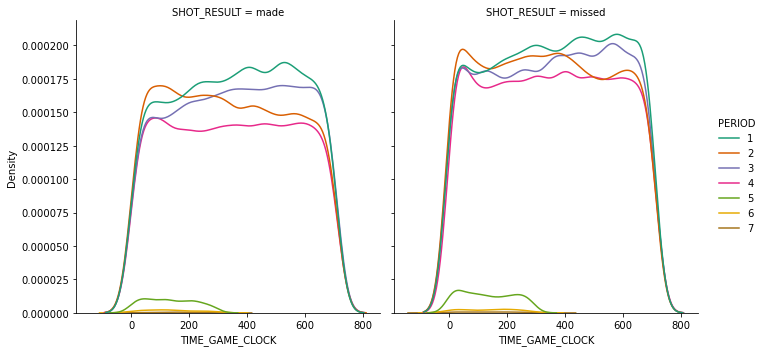

In [49]:
shots['TIME_GAME_CLOCK'] = pd.to_datetime(shots['GAME_CLOCK'],format= '%M:%S' ).dt.minute * 60 + pd.to_datetime(shots['GAME_CLOCK'],format= '%M:%S' ).dt.second
print(shots['TIME_GAME_CLOCK'].max())
f = sns.displot(data=shots, x="TIME_GAME_CLOCK", kind='kde', hue='PERIOD', col='SHOT_RESULT', palette='Dark2')

plt.show()

In [50]:
#preparing data for all numerical methods

shots['GAME_TIME'] = shots.apply(lambda row: (((row['PERIOD'] - 1) * 12 * 60 + (12 * 60 - row['TIME_GAME_CLOCK'])) if row['PERIOD'] <= 4 
                        else ((row['PERIOD'] - 5) * 5 * 60 + (5 * 60 - row['TIME_GAME_CLOCK'])) + 4 * 12 * 60), axis=1)


shots['GAME_TIME'].max()

3777

We can tell that SHOT_CLOCK has missing values this, however, is not a mistake but a specific situation when the shot clock is turned off in the ending 24 seconds of each quarter. This is a standard rule in basketball so we can replace those missing values with time on the game clock. This will not be 100% accurate, but it will give us a good approximation. 

There are no missing values in the dataset!


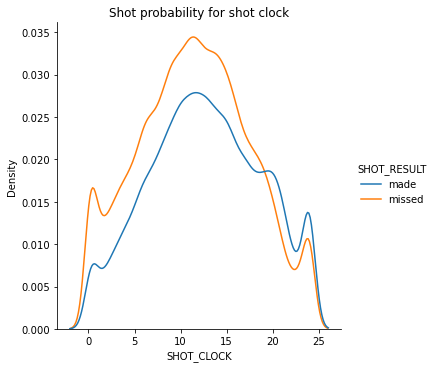

24.0


In [51]:
import math

change_values('SHOT_CLOCK', 'TIME_GAME_CLOCK', transformations=lambda x: float(f"{math.floor(x/60)}.{x%60}"))
check_missing_data(shots)

f = sns.displot(data=shots, x="SHOT_CLOCK", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for shot clock")
plt.show()

print(shots['SHOT_CLOCK'].max())

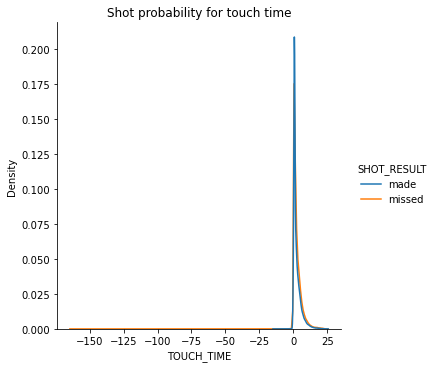

312


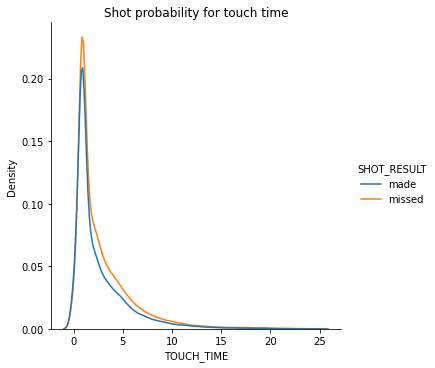

0.0


In [52]:
f = sns.displot(data=shots, x="TOUCH_TIME", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for touch time")
plt.show()

print(shots[shots['TOUCH_TIME'] < 0].count()['TOUCH_TIME'])

shots = shots[shots['TOUCH_TIME'] >= 0]

f = sns.displot(data=shots, x="TOUCH_TIME", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for touch time")
plt.show()

print(shots['TOUCH_TIME'].min())

There is an irregularity in data for touch time since there are some negative values. I couldn't find a reason for this so I just dropped those rows because the number of rows affected was rather small.

In [53]:
shots.head()
print(shots.columns)

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id', 'TIME_GAME_CLOCK', 'GAME_TIME'],
      dtype='object')


## Methods and training

The next step is taking the data and training various models on the training set. For each model, I used a 90/10 train test split. In this phase of the project, I didn't perform any feature engineering. I used accuracy as the primary metric, and I plotted confusion matrices to visualize the effect of class imbalance.

In [54]:
X = shots[['FINAL_MARGIN', 'SHOT_NUMBER', 'SHOT_CLOCK', 'TOUCH_TIME',
       'SHOT_DIST', 'CLOSE_DEF_DIST', 'GAME_TIME']]

y = np.ravel(shots[['FGM']])

X.corr()

,FINAL_MARGIN,SHOT_NUMBER,SHOT_CLOCK,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST,GAME_TIME
FINAL_MARGIN,1.000000,0.000735,-0.002508,0.011191,0.008983,0.033059,-0.004222
SHOT_NUMBER,0.000735,1.000000,-0.048830,0.146994,0.011704,-0.037666,0.687620
SHOT_CLOCK,-0.002508,-0.048830,1.000000,-0.146499,-0.183156,0.023699,-0.074686
TOUCH_TIME,0.011191,0.146994,-0.146499,1.000000,-0.086741,-0.167395,0.069797
SHOT_DIST,0.008983,0.011704,-0.183156,-0.086741,1.000000,0.522937,0.034168
CLOSE_DEF_DIST,0.033059,-0.037666,0.023699,-0.167395,0.522937,1.000000,-0.011207
GAME_TIME,-0.004222,0.687620,-0.074686,0.069797,0.034168,-0.011207,1.000000


I wrote a general function for training any given model. This function was used for each method except XGBoost.

In [55]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def train_model(X: pd.DataFrame, y: np.array, model_type=SGDClassifier(), scaler=StandardScaler(), test_size=0.1):
    """
    Function for training different ML methods. You can set different model, scaler, and test size. It prints accuracy scores and plots
    a confusion matrix. 
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

    if scaler:
        pipe = make_pipeline(scaler, model_type)
    else:
        pipe = make_pipeline(model_type)

    model = pipe.fit(X_train, y_train)

    print(f"Accuracy score for train data: {model.score(X_train, y_train)}")
    print(f"Accuracy score for test data: {model.score(X_test, y_test)}")

    disp_matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)), display_labels=model.classes_)
    disp_matrix.plot()
    plt.show()

    return model


### Logistic regression

This linear model performs decently on this problem given its simplicity. I was able to achive accuracy greater than 60% on test set. To achive good results it is necessary to use scaling and I used a StandardScaler from scikit-learn.

LOGISTIC REGRESSION
Accuracy score for train data: 0.6091093311068785
Accuracy score for test data: 0.6048058860363181


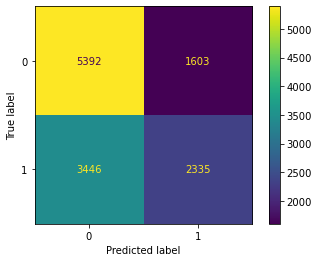

In [58]:
print("LOGISTIC REGRESSION")

log_reg = train_model(X, y, SGDClassifier(loss='log'))


### SVM

Data preparation was more or less the same with logistic regression. Accuracy on test set was also around 60% percent which is better than what Bret achived in his paper. I think that is due to the larger amount of data I used for training.

SVM
Accuracy score for train data: 0.6053079072027208
Accuracy score for test data: 0.6029515108924807


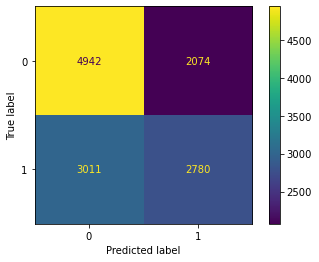

In [18]:
print("SVM")

svm = train_model(X, y, SGDClassifier(loss='hinge'))

### Neural network

Next, I used a neural network that can model complex nonlinear relationships in the data. Following Bret's paper, I used two NNs with one hidden layer with 50 neurons and one with ReLU, and the other with a sigmoid activation function. Accuracy was a bit better than with logistic regression and SVM. Generally, deeper NNs can model more complex relationships in the data, so that can be a point of further research.

NEURAL NET
Accuracy score for train data: 0.6206416712326385
Accuracy score for test data: 0.6206167814652473


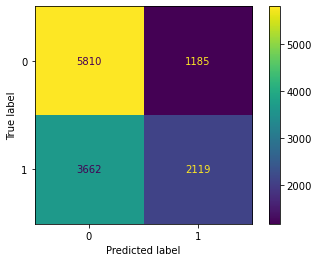

Accuracy score for train data: 0.6192414398900687
Accuracy score for test data: 0.618894802755166


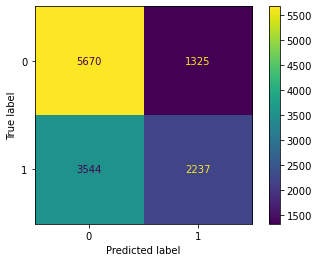

In [59]:
from sklearn.neural_network import MLPClassifier

print("NEURAL NET")

nn = train_model(X, y, MLPClassifier(hidden_layer_sizes=(50,)))
nn2 = train_model(X, y, MLPClassifier(hidden_layer_sizes=(50,), activation='logistic'))

Following methods, are better suited for using categorical variables so they might benefit from additional information they provide.

In [72]:
X_cat = shots[['GAME_ID', 'SHOT_NUMBER', 
       'PERIOD', 'DRIBBLES', 'PTS_TYPE',
       'CLOSEST_DEFENDER_PLAYER_ID', 'player_id']]

X_cat.corr()
print(X_cat.dtypes)

GAME_ID                       int64
SHOT_NUMBER                   int64
PERIOD                        int64
DRIBBLES                      int64
PTS_TYPE                      int64
CLOSEST_DEFENDER_PLAYER_ID    int64
player_id                     int64
dtype: object


### Naive Bayes

This simple algorithm didn't perform well on this dataset with or without categorical data. In my opinion this problem might be a little to complex for it. I included numerical data through binning. I binned numerical data in 4 categories.

NAIVE BAYES
Accuracy score for train data: 0.5127803724093546
Accuracy score for test data: 0.5097056981840952


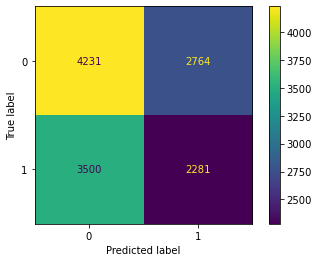

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

print("NAIVE BAYES")

nb = train_model(X_cat, y, MultinomialNB(), False)


In [75]:
for elem in X.columns:
    if elem not in X_cat.columns:
        print(elem)
        print([X[elem].min(), X[elem].mean() - X[elem].std(), X[elem].mean(), X[elem].mean() + X[elem].std(), X[elem].max()])
        new_col = pd.cut(X[elem], [X[elem].min(), X[elem].mean() - X[elem].std() if X[elem].mean() - X[elem].std() > X[elem].min() else (X[elem].min() + X[elem].mean())/2,
                        X[elem].mean(), X[elem].mean() + X[elem].std(), X[elem].max()], labels=False, include_lowest=True)
        X_cat.insert(len(X_cat.columns), elem, new_col, False)

X_cat.corr()

,GAME_ID,SHOT_NUMBER,PERIOD,DRIBBLES,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,player_id,FINAL_MARGIN,SHOT_CLOCK,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST,GAME_TIME
GAME_ID,1.000000,0.008284,-0.008819,0.001938,0.003336,0.028595,0.027689,0.002363,0.015294,-0.004412,0.000232,0.006906,-0.008463
SHOT_NUMBER,0.008284,1.000000,0.654968,0.141385,0.003055,0.013087,-0.006464,0.000785,-0.045076,0.124638,0.011021,-0.040434,0.656440
PERIOD,-0.008819,0.654968,1.000000,0.055311,0.048868,0.011270,0.004854,-0.004167,-0.048721,0.026526,0.031505,-0.008842,0.959616
DRIBBLES,0.001938,0.141385,0.055311,1.000000,-0.169628,0.016906,0.023756,0.012379,-0.085525,0.758685,-0.079261,-0.148070,0.073974
PTS_TYPE,0.003336,0.003055,0.048868,-0.169628,1.000000,0.006317,0.010594,0.021778,-0.038831,-0.283410,0.753136,0.428909,0.056675
CLOSEST_DEFENDER_PLAYER_ID,0.028595,0.013087,0.011270,0.016906,0.006317,1.000000,-0.002535,0.057165,-0.000682,0.013705,0.004466,-0.014374,0.011905
player_id,0.027689,-0.006464,0.004854,0.023756,0.010594,-0.002535,1.000000,-0.049415,0.035913,0.001443,-0.024452,0.006809,0.003218
FINAL_MARGIN,0.002363,0.000785,-0.004167,0.012379,0.021778,0.057165,-0.049415,1.000000,-0.004690,-0.009069,0.007869,0.029433,-0.005040
SHOT_CLOCK,0.015294,-0.045076,-0.048721,-0.085525,-0.038831,-0.000682,0.035913,-0.004690,1.000000,-0.113780,-0.151013,0.010959,-0.073243
TOUCH_TIME,-0.004412,0.124638,0.026526,0.758685,-0.283410,0.013705,0.001443,-0.009069,-0.113780,1.000000,-0.156599,-0.250927,0.033967


NAIVE BAYES
Accuracy score for train data: 0.5132326210417373
Accuracy score for test data: 0.5056355666875392


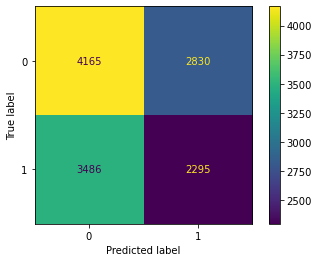

Accuracy score for train data: 0.5249823883946043
Accuracy score for test data: 0.5177676894176582


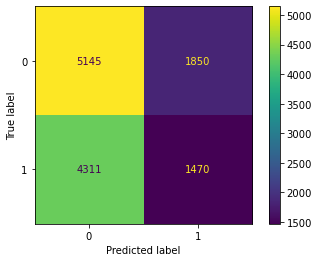

In [76]:
bayesX = X_cat.drop(labels=["SHOT_DIST", "GAME_TIME", "TOUCH_TIME"], axis=1)

print("NAIVE BAYES")

nb = train_model(X_cat, y, MultinomialNB(), False)
nb = train_model(bayesX, y, MultinomialNB(), False)

In [78]:
X_ensemble = shots[['GAME_ID', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'SHOT_CLOCK', 'TOUCH_TIME',
       'SHOT_DIST','CLOSEST_DEFENDER_PLAYER_ID', 
       'CLOSE_DEF_DIST', 'player_id','GAME_TIME']]

X_ensemble.corr()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,SHOT_CLOCK,TOUCH_TIME,SHOT_DIST,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id,GAME_TIME
GAME_ID,1.000000,0.001571,0.008284,0.015021,-0.000906,-0.000411,0.028595,0.006646,0.027689,-0.008547
FINAL_MARGIN,0.001571,1.000000,0.000735,-0.002508,0.011191,0.008983,0.057380,0.033059,-0.050677,-0.004222
SHOT_NUMBER,0.008284,0.000735,1.000000,-0.048830,0.146994,0.011704,0.013087,-0.037666,-0.006464,0.687620
SHOT_CLOCK,0.015021,-0.002508,-0.048830,1.000000,-0.146499,-0.183156,-0.001773,0.023699,0.036113,-0.074686
TOUCH_TIME,-0.000906,0.011191,0.146994,-0.146499,1.000000,-0.086741,0.016254,-0.167395,0.001924,0.069797
SHOT_DIST,-0.000411,0.008983,0.011704,-0.183156,-0.086741,1.000000,0.002868,0.522937,-0.024247,0.034168
CLOSEST_DEFENDER_PLAYER_ID,0.028595,0.057380,0.013087,-0.001773,0.016254,0.002868,1.000000,-0.015037,-0.002535,0.013205
CLOSE_DEF_DIST,0.006646,0.033059,-0.037666,0.023699,-0.167395,0.522937,-0.015037,1.000000,0.008750,-0.011207
player_id,0.027689,-0.050677,-0.006464,0.036113,0.001924,-0.024247,-0.002535,0.008750,1.000000,0.006340
GAME_TIME,-0.008547,-0.004222,0.687620,-0.074686,0.069797,0.034168,0.013205,-0.011207,0.006340,1.000000


### Random Forest

Now we are switching over to our first ensemble algorithm, Random Forest. This algorithm delivers results on par with neural networks and works well without scaling the data. Further, improvements could be done with a grid search for optimal parameters.

RANDOM FOREST
Accuracy score for train data: 0.7520372931179934
Accuracy score for test data: 0.6220256731371321


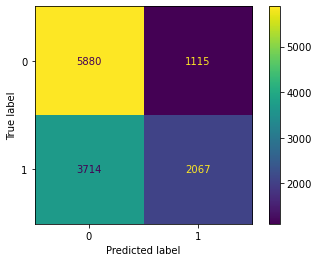

In [79]:
from sklearn.ensemble import RandomForestClassifier

print("RANDOM FOREST")

rf = train_model(X_ensemble, y, RandomForestClassifier(n_estimators=80, max_depth=15), False)

### XGBoost

Finally, we have the best algorithm in my project, XGBoost. I managed to obtain 67% accuracy on the test set that is 5% greater than the accuracy of other algorithms. To be fair XGBoost was the only method where I implemented grid search for best parameters so, to do a fair comparison, grid search will have to be implemented for all algorithms. I took parameters for grid search from [Kaggle user Pablo Castilla](https://www.kaggle.com/pablocastilla/predict-if-a-shot-is-made).

Accuracy score for train data: 0.6890655467226638
Accuracy score for test data: 0.6711322385479689


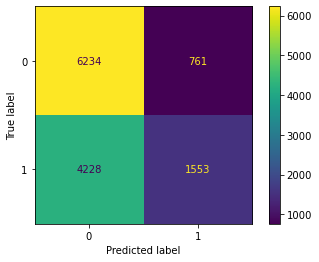

In [80]:
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer

X_xgb = shots[['FINAL_MARGIN', 'SHOT_NUMBER', 'SHOT_CLOCK', 'TOUCH_TIME',
       'SHOT_DIST', 'CLOSE_DEF_DIST', 'GAME_TIME', 'GAME_ID', 'CLOSEST_DEFENDER_PLAYER_ID', 'player_id']]

X_num = ['FINAL_MARGIN', 'SHOT_NUMBER', 'SHOT_CLOCK', 'TOUCH_TIME',
       'SHOT_DIST', 'CLOSE_DEF_DIST', 'GAME_TIME']
X_cat = ['GAME_ID', 'CLOSEST_DEFENDER_PLAYER_ID', 'player_id']

num_pipe = make_pipeline(StandardScaler())
cat_pipe = make_pipeline(OneHotEncoder())

final = ColumnTransformer(transformers=[
    ("numeric", num_pipe, X_num),
    ("categorical", cat_pipe, X_cat)
])

X_procc = final.fit_transform(X_xgb)

X_train, X_test, y_train, y_test = train_test_split(X_procc, y, test_size=0.1, stratify=y)

parameters_for_testing = {
    'min_child_weight':[0.0001,0.001,0.01],
    'learning_rate':[0.00001,0.0001,0.001],
    'n_estimators':[1,3,5,10],
    'max_depth':[3,4]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, scoring='precision')

xgb = gsearch1.fit(X_train, y_train)

print(f"Accuracy score for train data: {xgb.score(X_train, y_train)}")
print(f"Accuracy score for test data: {xgb.score(X_test, y_test)}")

disp_matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, xgb.predict(X_test)), display_labels=xgb.classes_)
disp_matrix.plot()
plt.show()

In [84]:
print(xgb.best_params_)

{'learning_rate': 1e-05, 'max_depth': 3, 'min_child_weight': 0.0001, 'n_estimators': 1}


## Conclusion

I implemented 6 machine learning methods to tackle the problem of predicting if a shot in the NBA will be made. I obtained slightly better results with most methods than Bret did in his paper. However, my best result of 67% percent using XGBoost is nothing remarkable, thus, leaving room for additional improvement. My first instinct would be to include the one-hot encoded categorical variables in numerical algorithms. Also, with this increased number of features, I would try and train deeper neural networks. Lastly, feature engineering wasn't used in any of the experiments and that leaves a lot of possibilities for further improvement.

## Summary

*Best method: XGBoost*

*Accuracy on test set: 67%*